# Ejemplo 4.1: Conducción de Calor 1D sin Fuentes
 
 Este notebook resuelve un problema básico de **conducción de calor 1D en estado estacionario** utilizando el Método de Volúmenes Finitos (FVM).
 
 ### Planteamiento del Problema
 
 Se considera una barra aislada de 0.5 m de longitud. Sus extremos se mantienen a temperaturas constantes de 100 °C y 500 °C. Se busca calcular la distribución de temperaturas a lo largo de la barra.
 
 **Ecuación Gobernante:**
 $$ \frac{d}{dx}\left(k\frac{dT}{dx}\right) = 0 $$
 
 **Datos:**
 - Conductividad térmica, $k = 1000 \, W/m \cdot K$
 - Área de la sección transversal, $A = 10 \times 10^{-3} \, m^2$
 - Longitud, $L = 0.5 \, m$
 - Temperatura en A, $T_A = 100 ^{\circ} C$
 - Temperatura en B, $T_B = 500 ^{\circ} C$

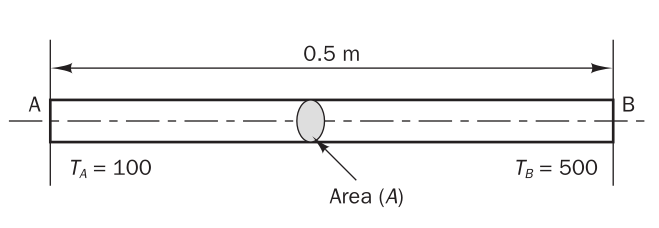

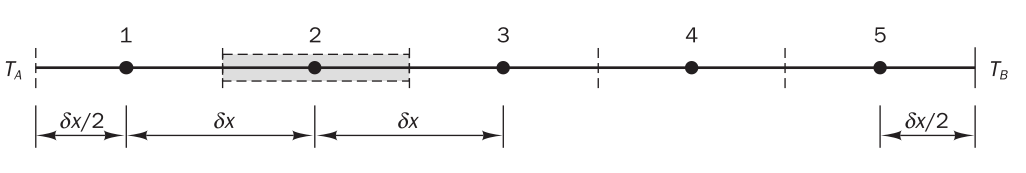

In [1]:
from mnspy import Vertice, Celda, Superficie, VolumenFinito, SuperficieDirichlet

### Paso 1: Definición de Parámetros y Discretización

Se discretiza el dominio en 5 volúmenes de control (celdas) de igual tamaño.

In [2]:
T_0 = 100
T_5 = 500
delta_x = 0.1
k = 1000
A = 10E-3

# Se crean los 6 vértices que definen los límites de las 5 celdas.
v = [Vertice(str(i), i*delta_x) for i in range(6)]

# Se crean las 6 superficies (caras de las celdas).
# Las superficies de los extremos son de tipo Dirichlet (temperatura fija).
s = [SuperficieDirichlet('0',[0], {'T': T_0}, A)]
s.append(Superficie('1',[1], A))
s.append(Superficie('2',[2], A))
s.append(Superficie('3',[3], A))
s.append(Superficie('4',[4], A))
s.append(SuperficieDirichlet('5',[5], {'T': T_5}, A))

# Se crean las 5 celdas (volúmenes de control), asignando la conductividad k.
c = [Celda(str(i+1),[i,i+1], k) for i in range(len(s)-1)]

### Paso 2: Ensamblaje y Solución

In [3]:
# Se crea el objeto `VolumenFinito` que gestiona todo el problema.
vol = VolumenFinito(v,s,c, escalar_phi='T')

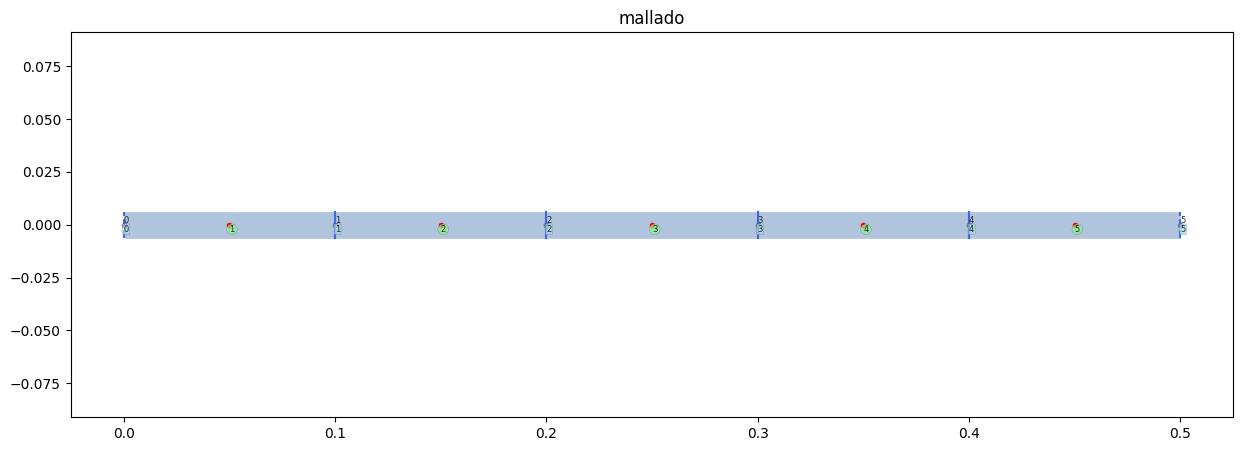

In [4]:
# Se construye la malla y las relaciones entre celdas y superficies.
vol.mallado()

In [5]:
# Se muestran las ecuaciones de balance de calor para cada celda.
vol.mostrar_ecuaciones()

<IPython.core.display.Math object>

In [6]:
# Se resuelve el sistema de ecuaciones lineales resultante.
vol.solucionar_por_Gauss()
vol.mostrar_sistema_lineal_ecuaciones()

<IPython.core.display.Math object>

In [7]:
# Se muestra la solución (temperaturas en el centro de cada celda).
vol._sol.solucion()

,Solución
$T_{1}$,140
$T_{2}$,220
$T_{3}$,300
$T_{4}$,380
$T_{5}$,460


### Paso 3: Post-procesamiento y Visualización

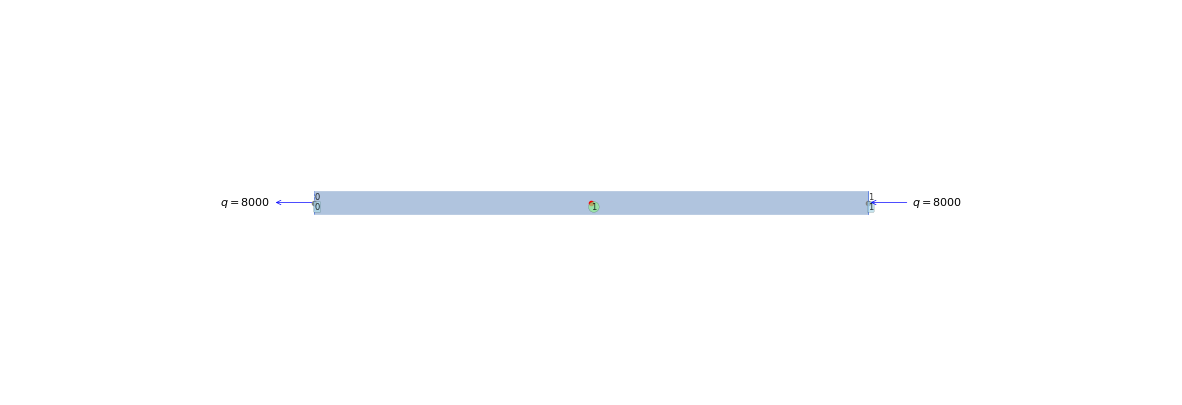

In [8]:
# Diagrama de balance para la primera celda, mostrando los flujos de calor.
vol.get_celda('1').diagrama_balance()

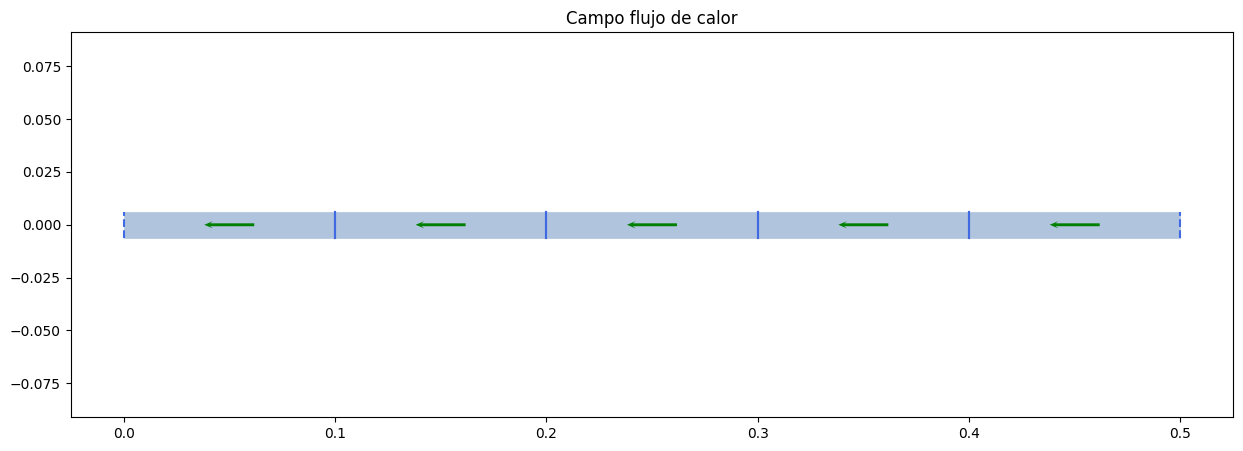

In [9]:
# Diagrama de los flujos de calor a través de todas las superficies.
vol.diagrama_campo_flujos()

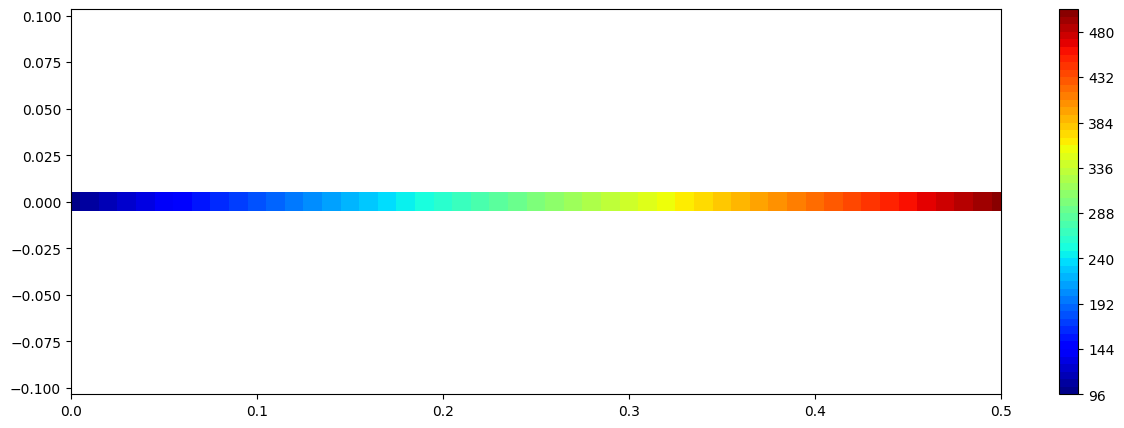

In [10]:
# Gráfica de la distribución de temperaturas a lo largo de la barra.
vol.diagrama_T()

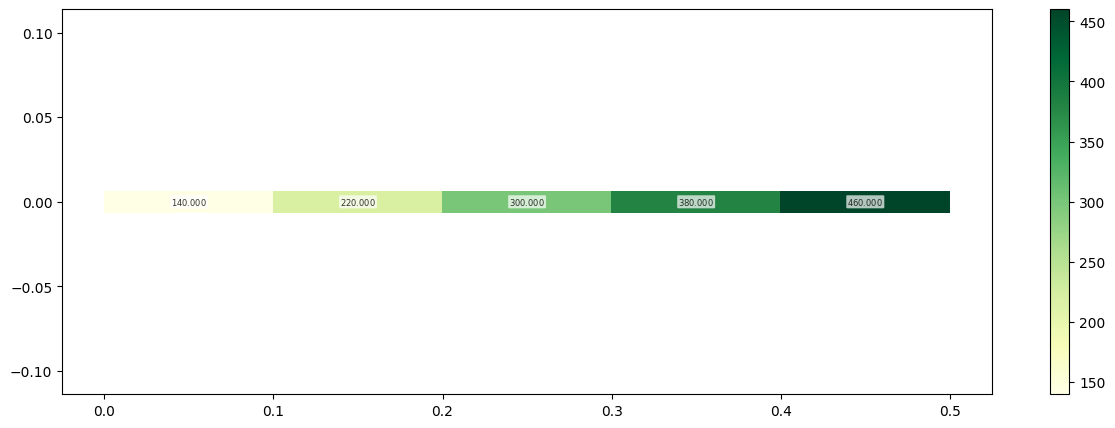

In [11]:
# Gráfica de la solución con los valores en los nodos.
vol.diagrama_valores_escalar()

**Conclusión:** Como se esperaba para un problema de conducción pura sin fuentes, la distribución de temperatura es perfectamente lineal.